<h1>Final Thoughts</h1>

<h4> What is the metric </h4>
The metric that we came up with is what neighborhood is the most benifical to the city. What we mean by this is simple. We looked at a bunch of diffrent data sets, one that gave information about trees, one that gave info about all the fire incidents in the city, and the last data set was all the 3-1-1 calls in the city. We chose very diffrent sets becuase to determine the "best" neighborhood you have to be broad. Each of our data sets attempt to get it down to  a sample of neighborhoods and then we compare them to eachothers data set samples. 

<h4> the best neighborhood </h4>
Our answer is East Carnegie 

<h3> Data set 1: trees </h3>
This was a really instresting set to work with just becuase of the scale of the whole thing. 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
trees = pd.read_csv("tree_Data.csv", low_memory = False)
trees.head(5)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106


Something that I knew that I had to do from the start was really work to make it digestable. To do this I examined all the information that this data set gave me and it was a lot. 

In [13]:
trees.filter(items = ['overall_benefits_dollar_value','neighborhood'])

,overall_benefits_dollar_value,neighborhood
0,NaN,Homewood North
1,125.178322,Oakwood
2,77.767116,South Side Flats
3,81.838259,East Allegheny
4,390.538994,Highland Park
...,...,...
45704,215.042657,Point Breeze North
45705,47.889284,Squirrel Hill North
45706,47.889284,Squirrel Hill North
45707,47.889284,Squirrel Hill North


A simple filter on the data set shows that there is actualy some very usefull data in here. If I was going to use somthing as metric it would be similar to this as the value of a dollar is very easy to digest.  

In [15]:
tree_dict = (trees.groupby('neighborhood').overall_benefits_dollar_value.median()).to_dict() 

In [16]:
print(tree_dict)

{'Allegheny Center': 174.623107103, 'Allegheny West': 120.062255169, 'Allentown': 117.2930078085, 'Arlington': 49.008668432099995, 'Arlington Heights': 202.272850786, 'Banksville': 116.702199174, 'Bedford Dwellings': 48.0984067239, 'Beechview': 92.8053268554, 'Beltzhoover': 108.730609964, 'Bloomfield': 82.2188501225, 'Bluff': 68.9389532889, 'Bon Air': 88.7894182384, 'Brighton Heights': 109.86041445800001, 'Brookline': 118.773008461, 'California-Kirkbride': 105.047563877, 'Carrick': 90.2032728081, 'Central Business District': 82.8933780303, 'Central Lawrenceville': 56.2121691941, 'Central Northside': 85.6451174555, 'Central Oakland': 110.520653484, 'Chartiers City': 117.8465146625, 'Chateau': 96.5507091598, 'Crafton Heights': 116.702199174, 'Crawford-Roberts': 85.6451174555, 'Duquesne Heights': 72.4832284541, 'East Allegheny': 87.850429656, 'East Carnegie': 184.9555221905, 'East Hills': 135.3272557055, 'East Liberty': 69.2360469007, 'Elliott': 123.242789063, 'Esplen': 106.49164549080001

<h3> Why a dictionary </h3>
the short answer is that they are faster then python lists mainly becuase it uses hashes to store all the information. However there is another reason on why I stored it in a dictionary. The key-value pair makes it easy to look at and understand.<br>
<h3>Why the median </h3> 
when examining the data distribution it was skewed to the right which in statisitics to measure the middle of data of somthing that is skewed to the right we use the median over the mean.

In [17]:
sorted(tree_dict, key = tree_dict.get, reverse = True)[:5]

['St. Clair', 'Fairywood', 'Arlington Heights', 'East Carnegie', 'Hays']

These values have the highest means for benefits in dollar value. <br> in terms of the tree data you could easily make the case for any of these specificly.  

<h1> Data set 2 Fires </h1>

In [2]:
import pandas as pd
%matplotlib inline
# import pandas and matplotlib

In [3]:
fire = pd.read_csv("Fire.csv")
fire.head(5)
# get some basic idea about the dataset

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [4]:
fire = fire.drop(axis = 1, labels = 'address')
fire = fire.drop(axis = 1, labels = 'census_tract')
fire = fire.drop(axis = 1, labels = 'ward')
fire = fire.drop(axis = 1, labels = 'tract')
fire = fire.drop(axis = 1, labels = 'public_works_division')
fire = fire.drop(axis = 1, labels = 'pli_division')
fire = fire.drop(axis = 1, labels = 'police_zone')
fire = fire.drop(axis = 1, labels = 'latitude')
fire = fire.drop(axis = 1, labels = 'longitude')
fire = fire.drop(axis = 1, labels = 'call_no')
fire = fire.drop(axis = 1, labels = 'type_description')
fire = fire.drop(axis = 1, labels = 'alarm_time')
fire = fire.drop(axis = 1, labels = 'alarms')
fire = fire.drop(axis = 1, labels = 'council_district')
fire = fire.drop(axis = 1, labels = 'primary_unit')
fire = fire.drop(axis = 1, labels = 'fire_zone')
fire.sample(5)
# filter out columns that are not helpful to the metrix

,incident_type,neighborhood
3832,111.0,East Hills
6785,113.0,Homewood South
2915,151.0,NaN
4295,131.0,Hazelwood
3427,131.0,Perry North


In [5]:
fire.dropna(axis = 0, inplace = True)
fire.sort_values("incident_type")
# drop nan values out and sort based on incident type

,incident_type,neighborhood
623,100.0,Squirrel Hill South
7387,100.0,Bluff
5737,100.0,Beltzhoover
5124,100.0,Beltzhoover
3837,100.0,East Allegheny
...,...,...
4455,170.0,California-Kirkbride
3902,170.0,Point Breeze North
7184,170.0,South Side Slopes
2120,171.0,Manchester


In [6]:
weighted_case = []
size = fire['incident_type'].size
for i in range (size):
    if (fire.iat[i, 0] == 111):
        weighted_case.append(1.2)
    elif (fire.iat[i, 0] == 131):
        weighted_case.append(1.5)
    else:
        weighted_case.append(1)
# print(weighted_case)
fire["value"] = weighted_case
fire.sample(10)
# create weight based on type of fire incident, I think some types of fire are more dangerous than others

,incident_type,neighborhood,value
491,113.0,Central Business District,1.0
4073,111.0,Middle Hill,1.2
3217,112.0,Central Business District,1.0
4991,131.0,Beltzhoover,1.5
4883,113.0,Lincoln-Lemington-Belmar,1.0
1589,113.0,Lincoln-Lemington-Belmar,1.0
5210,111.0,Homewood North,1.2
1223,111.0,Oakwood,1.2
2667,131.0,North Oakland,1.5
1829,113.0,Hazelwood,1.0


In [7]:
values = fire.groupby(['neighborhood']).mean()
# calculate the overall "dangerousness" of each neighborhood

In [8]:
values.head(10)

,incident_type,value
neighborhood,,
Allegheny Center,131.204082,1.038776
Allegheny West,135.470588,1.147059
Allentown,124.990566,1.128302
Arlington,132.121951,1.085366
Arlington Heights,120.250000,1.058333
Banksville,128.372549,1.098039
Bedford Dwellings,122.277778,1.075000
Beechview,127.092437,1.133613
Beltzhoover,124.486239,1.146789


In [9]:
values.drop(axis = 1, labels = "incident_type", inplace = True)
# but the mean of incident code doesn't mean anything so dropped

In [10]:
fbn = fire.groupby(['neighborhood']).count()
fbn.drop(axis = 1, labels = "value", inplace = True)
# get the number of incidents

In [11]:
fbn.head(5)

,incident_type
neighborhood,
Allegheny Center,49
Allegheny West,34
Allentown,106
Arlington,41
Arlington Heights,12


In [12]:
fbn.rename(columns = {"incident_type": "case_count"}, inplace = True)

In [13]:
fbn.head(5)

,case_count
neighborhood,
Allegheny Center,49
Allegheny West,34
Allentown,106
Arlington,41
Arlington Heights,12


In [14]:
fbn_sorted = fbn.sort_values("case_count")
fbn_sorted
# these are the best ones

,case_count
neighborhood,
Regent Square,6
Mount Oliver Borough,6
East Carnegie,8
Mt. Oliver,10
Chartiers City,11
...,...
Hazelwood,206
South Side Flats,207
Squirrel Hill South,210


<AxesSubplot:ylabel='neighborhood'>

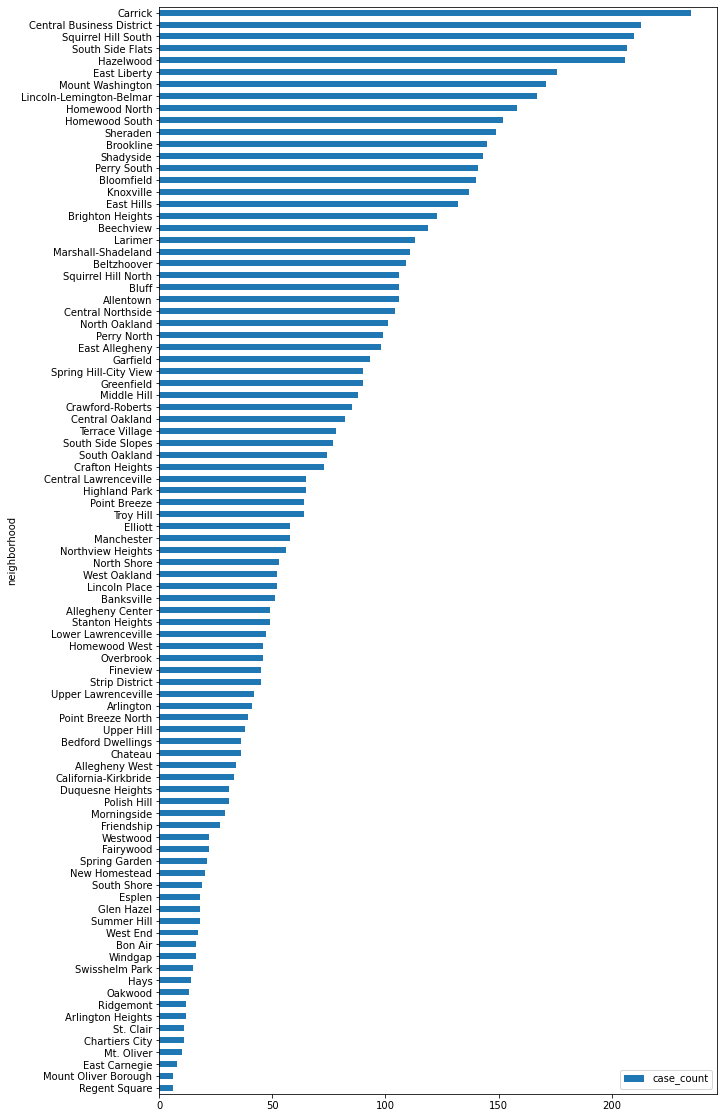

In [51]:
fbn_sorted.plot.barh(figsize = (10,20), xlabel = 'neighborhood', ylabel = 'total cases')

In [ ]:
The presented version was a line showing general curve of the data
I changed it to a more comprehensive bar figure

In [31]:
fire_final = fbn_sorted.merge(values, how='inner', on='neighborhood')
# now combine the data of total cases with the value indicating dangerousness

In [53]:
overall = []
size = fire_final['case_count'].size
for i in range (size):
    overall.append(fire_final.iloc[i, 0] * fire_final.iloc[i, 1])
# print(overall)
fire_final['overall'] = overall

In [70]:
fire_final.sort_values("overall")

,case_count,value,overall
neighborhood,,,
Mount Oliver Borough,6,1.066667,6.4
Regent Square,6,1.116667,6.7
East Carnegie,8,1.050000,8.4
Mt. Oliver,10,1.080000,10.8
Chartiers City,11,1.100000,12.1
...,...,...,...
South Side Flats,207,1.053623,218.1
Hazelwood,206,1.089806,224.5
Central Business District,213,1.055399,224.8


<AxesSubplot:xlabel='neighborhood'>

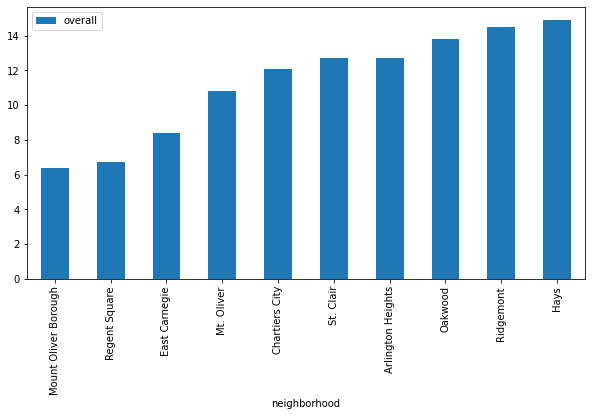

In [71]:
fire_final.sort_values("overall").head(10).plot.bar(figsize = (10, 5), y = 'overall')
# data plot with the overall best neighborhoods

# Dataset 2 Result
Based on my metrix made from number of fire incidencies reported in each neighborhood and the relative dangerousness, the best neighborhoods could be one of the following: Mt. Oliver Borough, Regent Square, East Carnigie.

<h1> Last data set </h1>
For the last data set we looked at 3-1-1 calls in pittsburgh

In [28]:
three = pd.read_csv('311.csv', low_memory = False)
print(three['NEIGHBORHOOD'].value_counts())
s1 = three['NEIGHBORHOOD'].value_counts()

Brookline               20529
Carrick                 19523
South Side Slopes       16293
Squirrel Hill South     16257
South Side Flats        14763
                        ...  
East Carnegie             459
Northview Heights         456
Glen Hazel                309
Arlington Heights          99
Mount Oliver Borough       59
Name: NEIGHBORHOOD, Length: 91, dtype: int64


<AxesSubplot:>

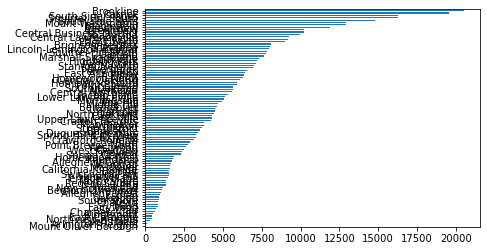

In [29]:
three.NEIGHBORHOOD.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

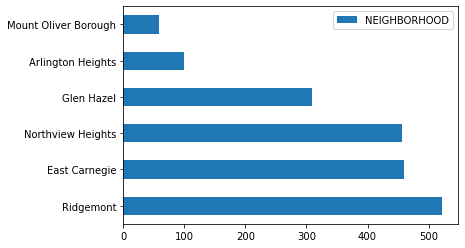

In [30]:
df = s1.to_frame()
df = df[85:]
df.plot(kind = 'barh')

<h2> Conclusion </h2>

After getting a bunch of samples of data there is one neighborhood that has shown up in each sample. That is East Carnegie. This is why we decieded that this was the best neighborhood. As each sampleing that we would do it would show up